In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
from pandas.plotting import scatter_matrix
import scipy.stats as st
import statistics as stats

In [2]:
df3 = pd.read_csv("DF2_STATS.csv")

# Dealing with outliers

In [3]:
cat_features = df3.select_dtypes('object').copy()
num_features = df3.select_dtypes(['float64', 'int64']).copy()
cat_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [4]:
num_features.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Zscore
0,41.920786,1.016716,1.770313,2.146294,3.426960,2.464492,3.397665,6438.949336,7.077818,9.898765,...,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972,0.580921
1,51.589037,6.920808,1.035333,3.470803,1.813458,1.788697,1.584059,4457.659622,1.114423,14.495151,...,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207,1.610741
2,33.131540,2.198662,2.118801,3.979420,1.877226,0.833488,3.301009,2124.545220,5.539591,15.401596,...,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000,-0.355272
3,34.707073,2.937851,3.670674,3.734705,2.932646,1.095372,3.220844,2771.699080,0.772793,9.757546,...,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000,-0.187453
4,24.790188,1.988953,1.120496,1.079412,3.117739,0.937746,1.697330,3254.601575,10.118125,11.920147,...,2.720431,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353,-1.243757


In [5]:
def plot_numeric_variable_boxplots(df3):
    numerical_vars = df3.select_dtypes(include=['float64', 'int64']).columns
    num_vars = len(numerical_vars)
    rows = (num_vars // 4) + (num_vars % 4)
    
    fig, axs = plt.subplots(rows, 4, figsize=(20, 6*rows))
    axs = axs.flatten()
    
    for i, var in enumerate(numerical_vars):
        sns.boxplot(data=df3, x=var, ax=axs[i])
        axs[i].set_title(f"Boxplot of {var}")
    
    for i in range(num_vars, 4*rows):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()

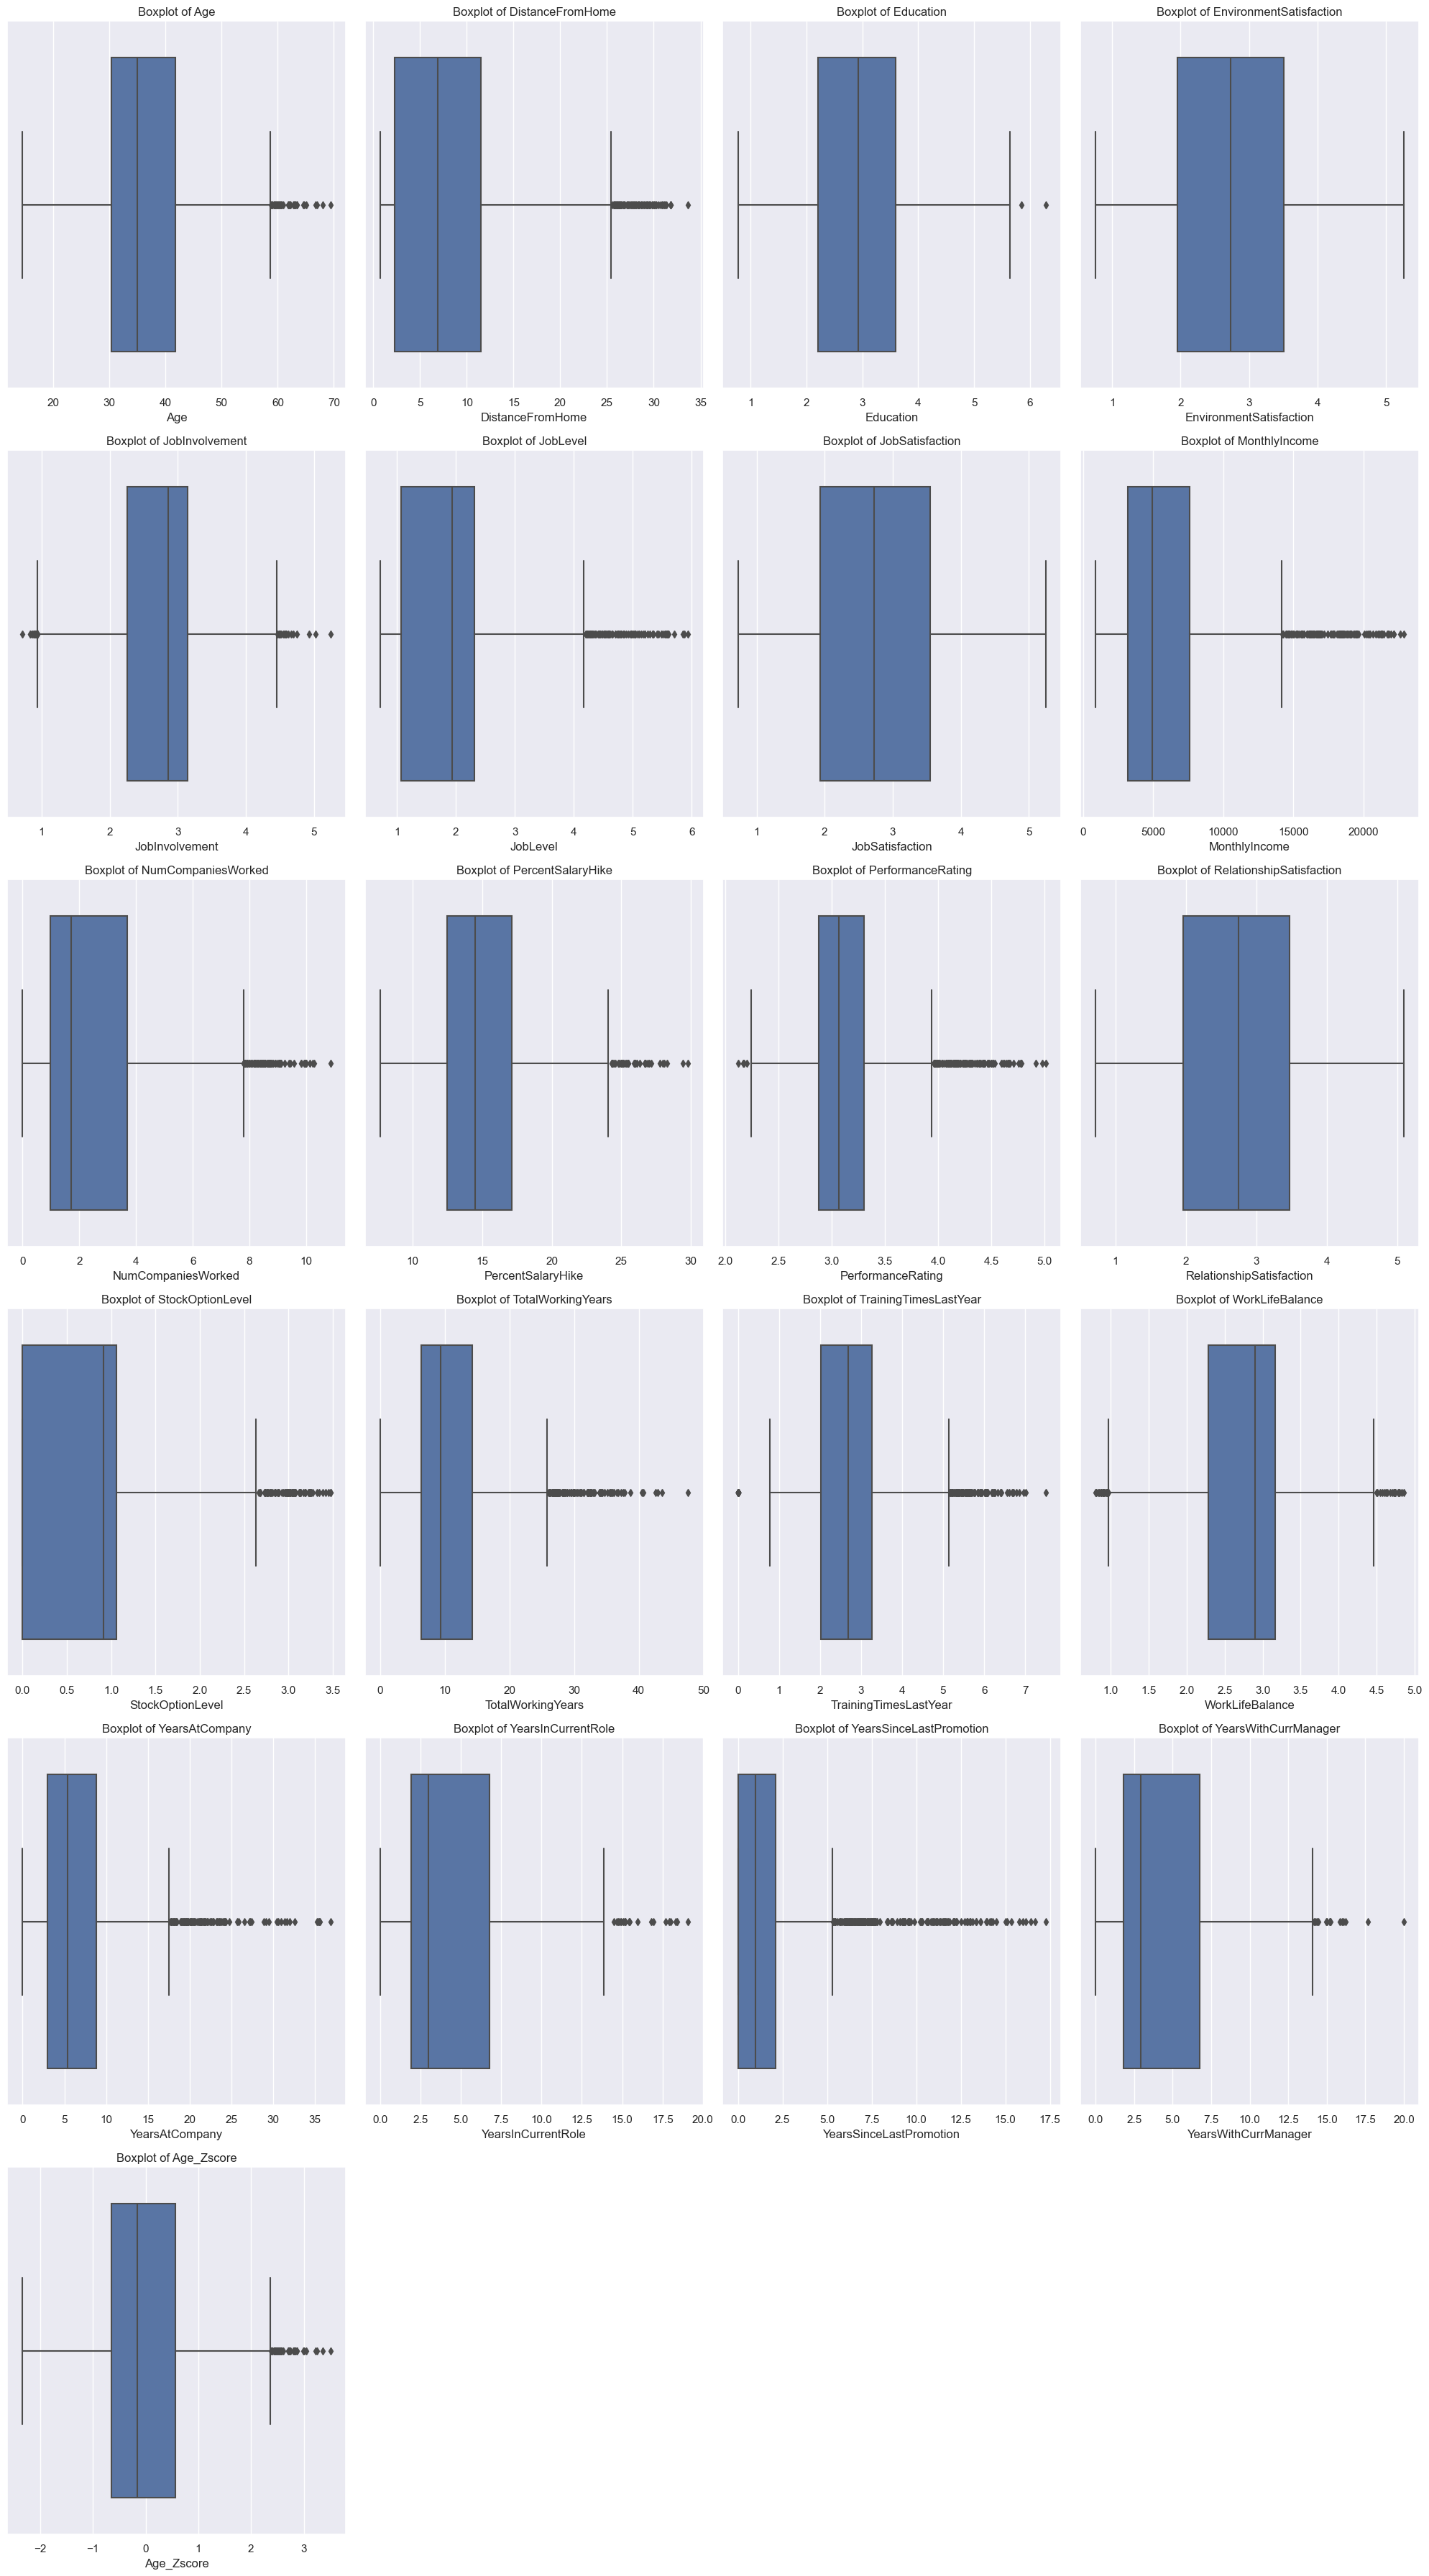

In [6]:
plot_numeric_variable_boxplots(num_features)

In [7]:
def replace_outliers_with_upper(dataframe, method='iqr', multiplier=1.5):
    numerical_vars = dataframe.select_dtypes(include=['float64', 'int64']).columns
    for var in numerical_vars:
        if method == 'iqr':
            Q1 = dataframe[var].quantile(0.25)
            Q3 = dataframe[var].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            dataframe[var] = np.where(dataframe[var] >= upper_bound, upper_bound, dataframe[var])
        elif method == 'std':
            mean = dataframe[var].mean()
            std = dataframe[var].std()
            lower_bound = mean - multiplier * std
            upper_bound = mean + multiplier * std
            dataframe[var] = np.where(dataframe[var] >= upper_bound, dataframe[dataframe[var] <= upper_bound][var].max(), dataframe[var])
        else:
            raise ValueError("Invalid method. Choose either 'iqr' or 'std'.")
    return dataframe

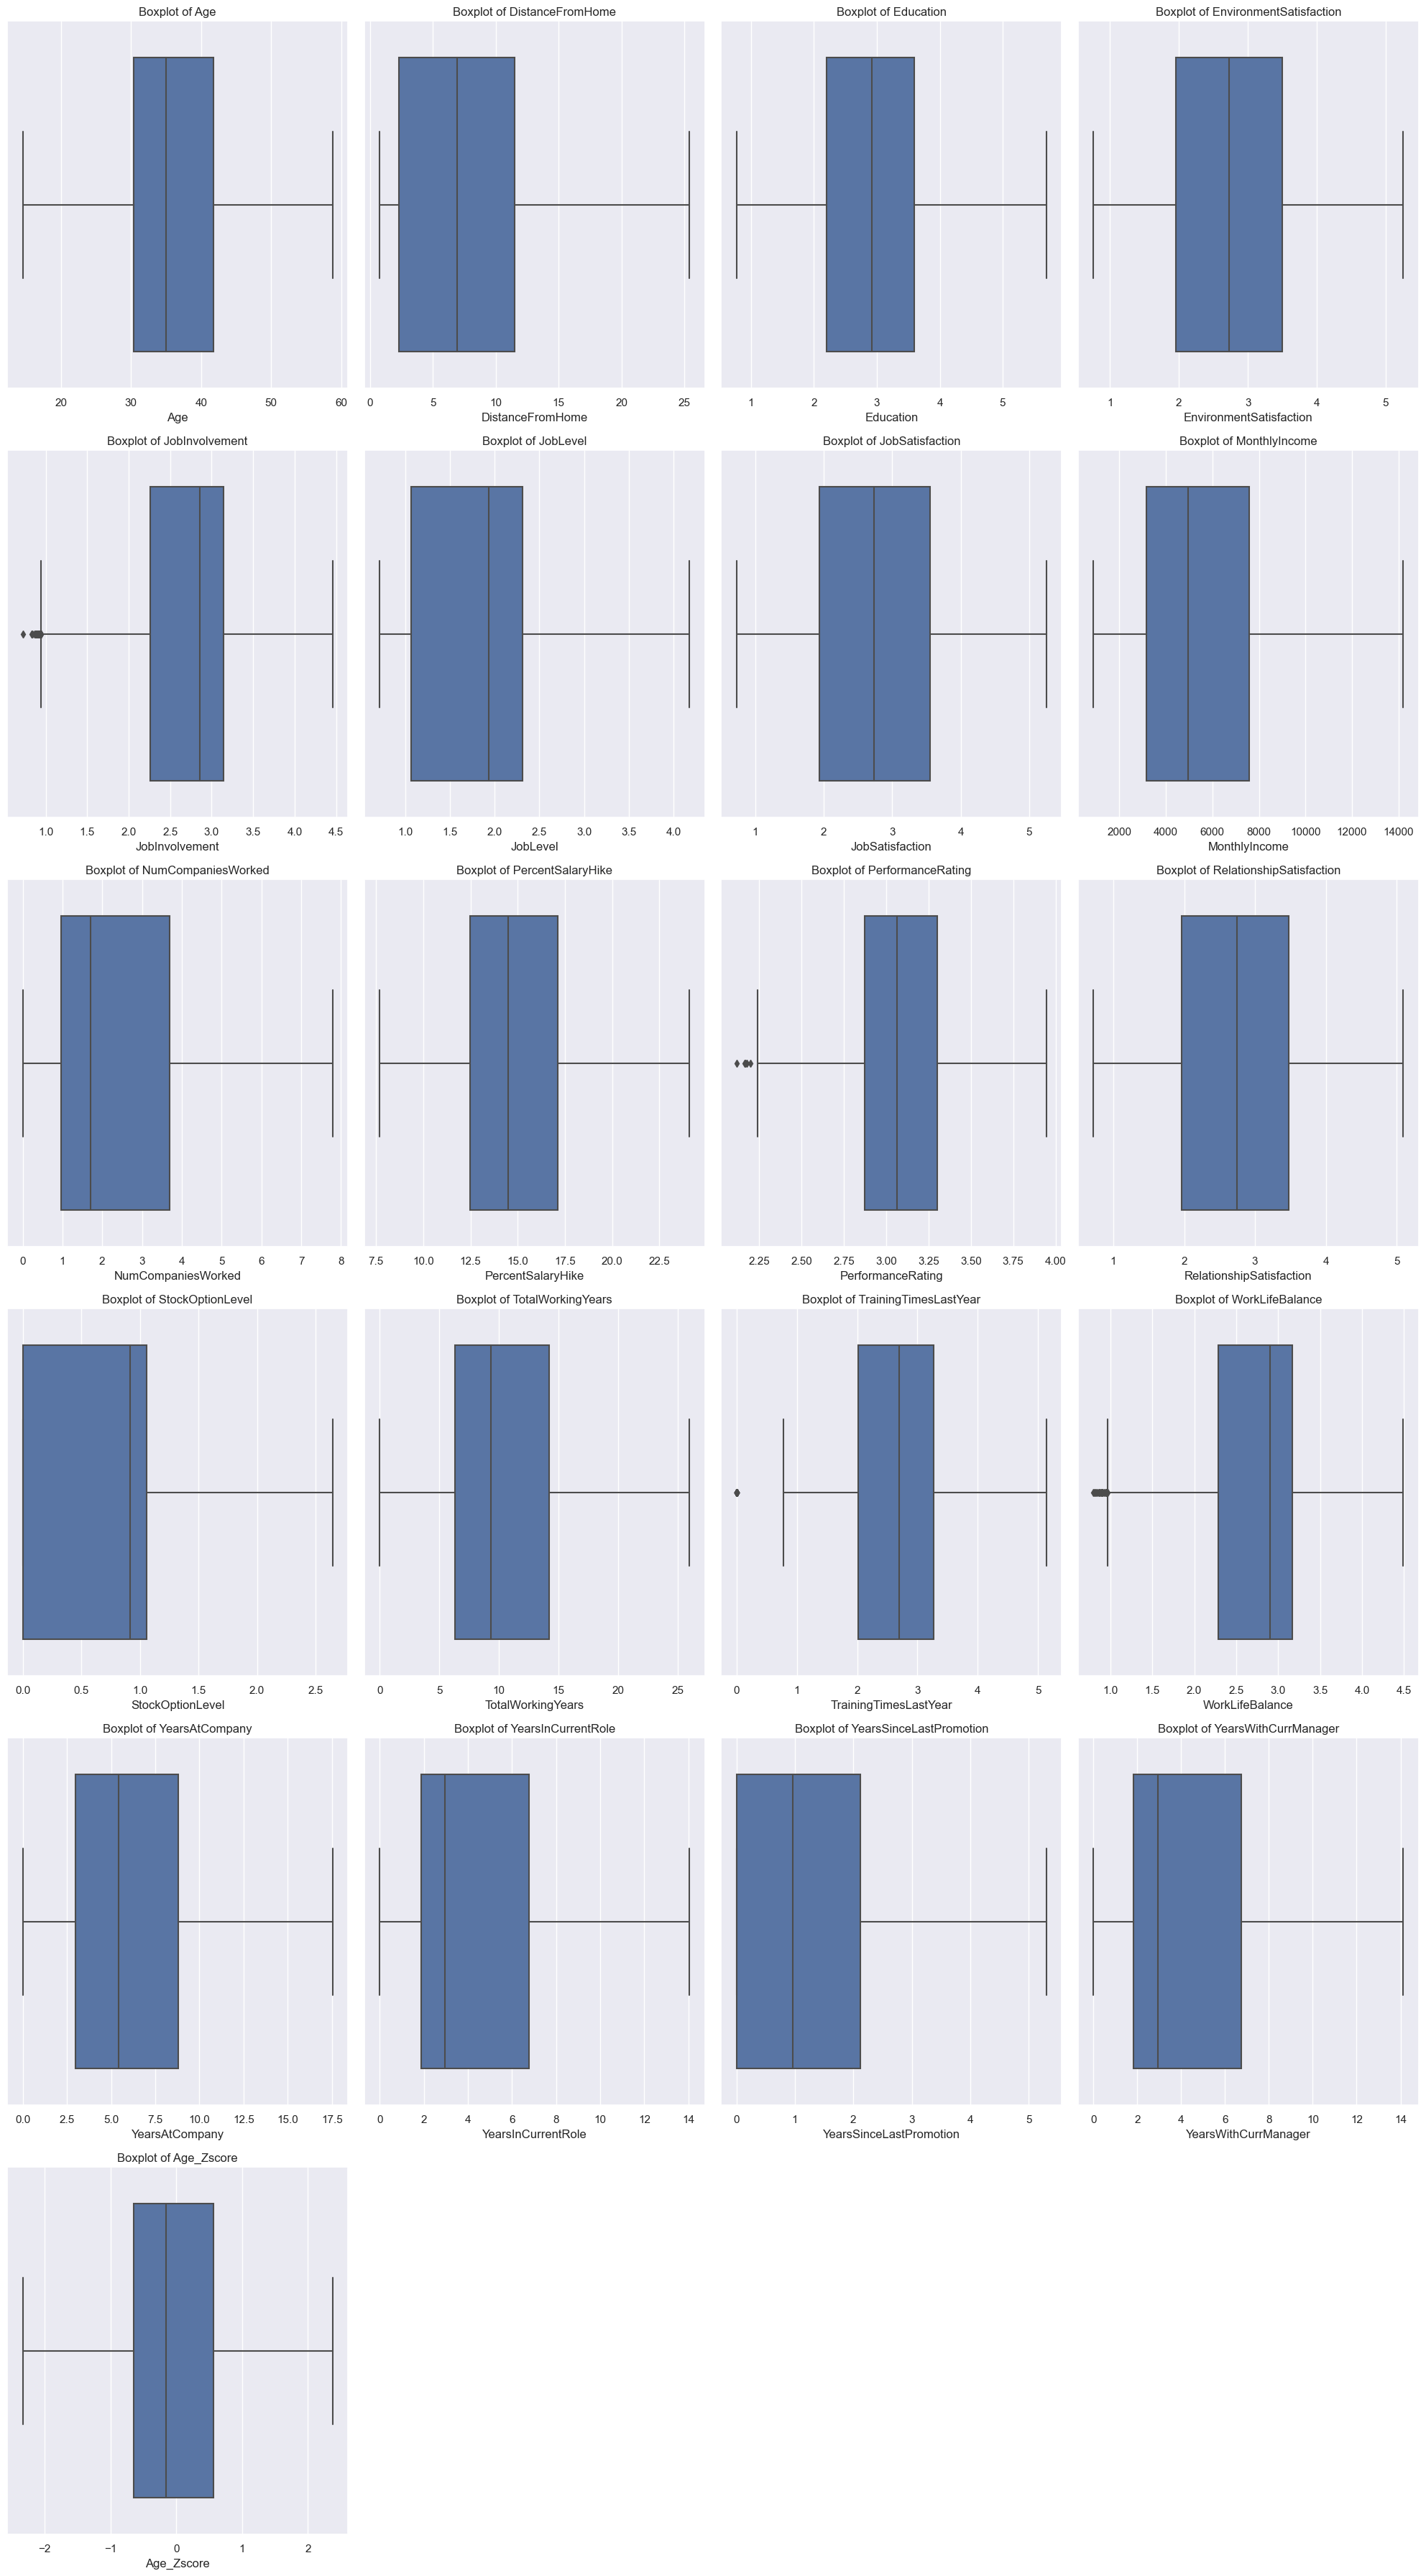

In [8]:
num_features = replace_outliers_with_upper(num_features)
plot_numeric_variable_boxplots(num_features)

In [9]:
num_columns = list(num_features.columns)
cat_columns = list(cat_features.columns)

In [10]:
df3[num_columns] = num_features
df3[cat_columns] = cat_features
df3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Zscore
0,41.920786,Yes,Travel_Rarely,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,3.426960,...,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972,0.580921
1,51.589037,No,Travel_Frequently,Research & Development,6.920808,1.035333,Life Sciences,3.470803,Male,1.813458,...,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207,1.610741
2,33.131540,Yes,Travel_Rarely,Research & Development,2.198662,2.118801,Other,3.979420,Male,1.877226,...,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000,-0.355272
3,34.707073,No,Travel_Frequently,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,2.932646,...,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000,-0.187453
4,24.790188,No,Travel_Rarely,Research & Development,1.988953,1.120496,Medical,1.079412,Male,3.117739,...,2.720431,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353,-1.243757


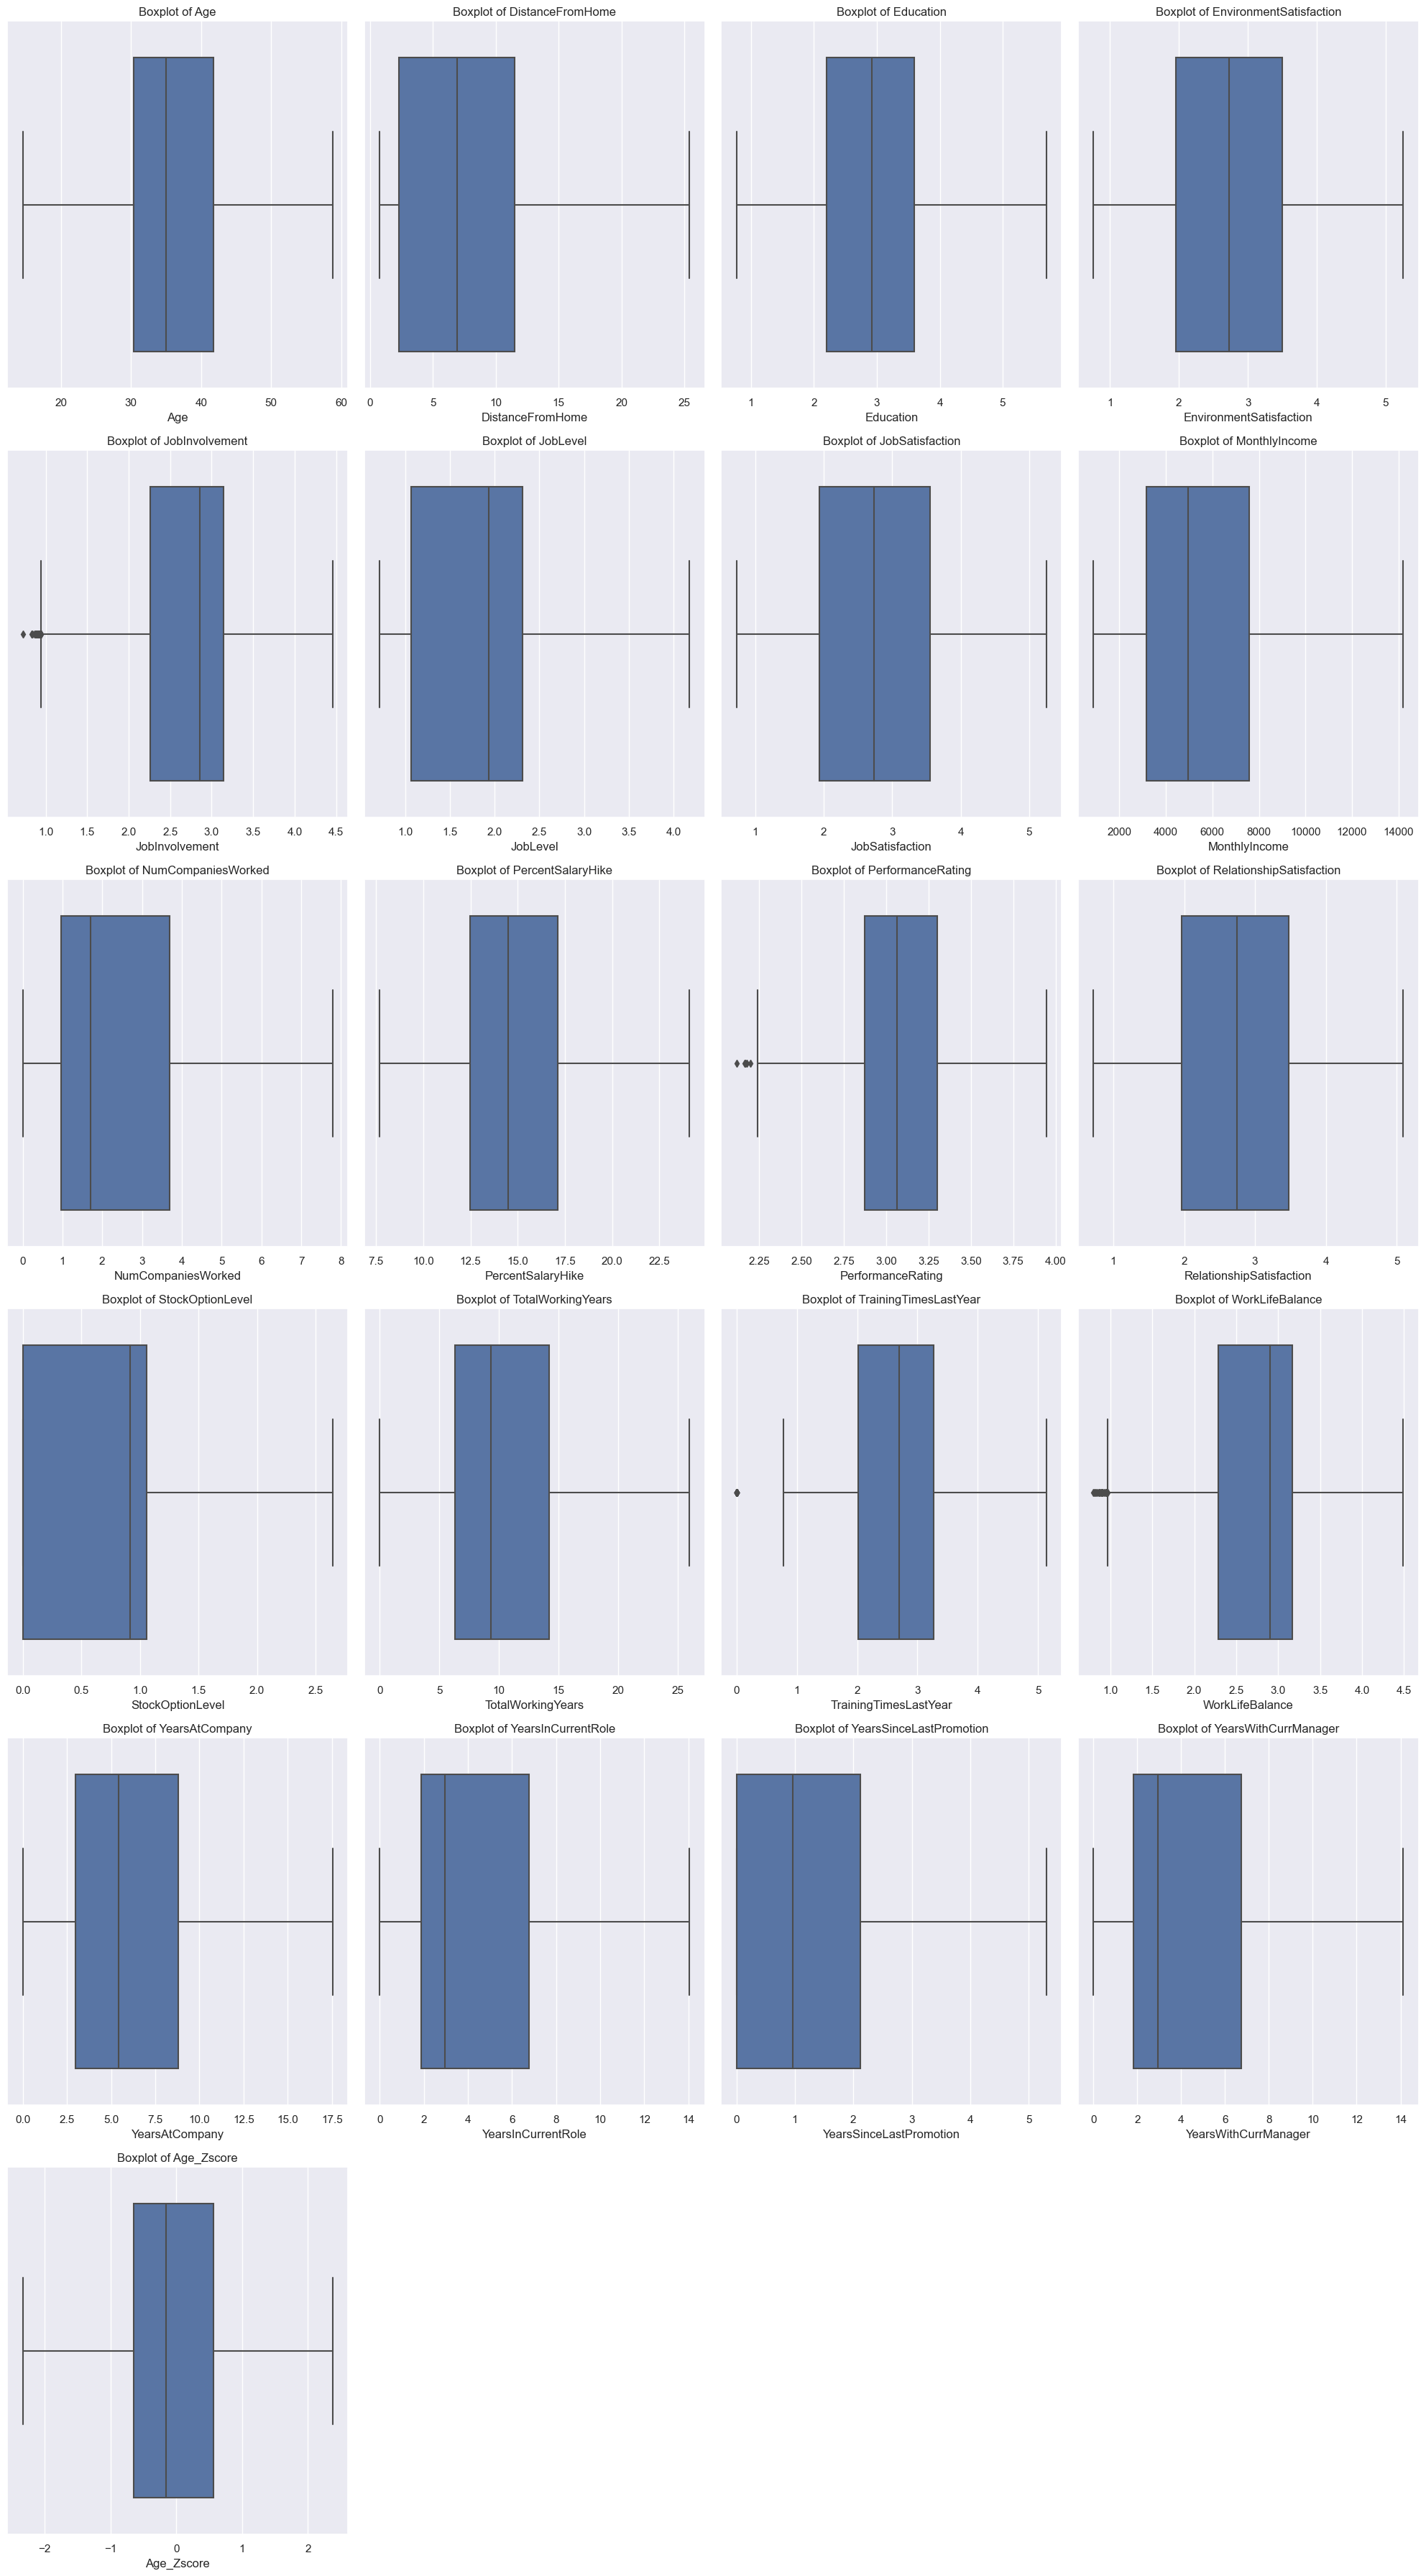

In [11]:
plot_numeric_variable_boxplots(df3)

# Encoding

In [12]:
df4=df3.copy()

In [13]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df4['Attrition']=label_encoder.fit_transform(df3['Attrition'])
df4['OverTime']=label_encoder.fit_transform(df3['OverTime'])
df4['Gender']=label_encoder.fit_transform(df3['Gender'])

In [14]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df4=pd.get_dummies(df4, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

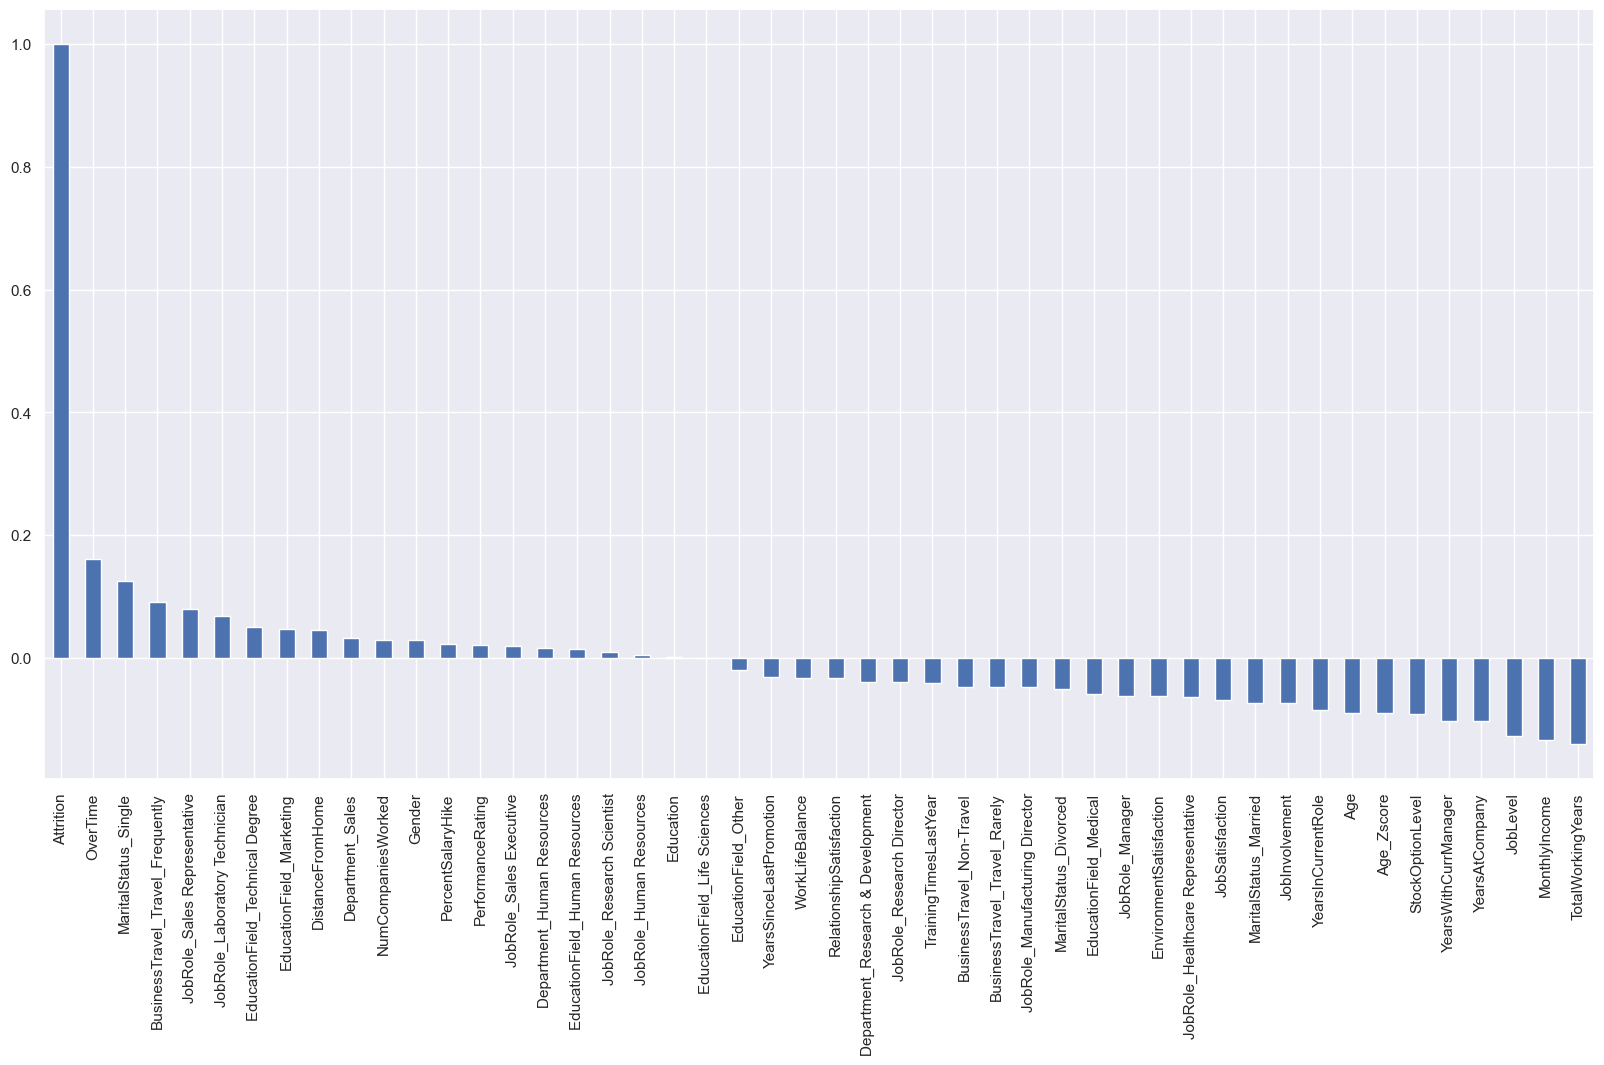

In [15]:
plt.figure(figsize=(20,10))
correlations=df4.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

# LDA

In [16]:
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preproc

In [17]:
X = df4.drop('Attrition', axis=1)
y = df4['Attrition']

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
lda = LDA(n_components=min(X_train.shape[1], len(np.unique(y_train)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [21]:
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
fit1 = classifier.fit(X_train_lda, y_train)

In [22]:
y_pred = fit1.predict(X_test_lda)

In [23]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[357   8]
 [ 65  11]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       365
           1       0.58      0.14      0.23        76

    accuracy                           0.83       441
   macro avg       0.71      0.56      0.57       441
weighted avg       0.80      0.83      0.79       441



# PCA

In [48]:
from cycler import cycler
import mglearn
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [49]:
from sklearn.decomposition import PCA

In [55]:

df4.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41.920786,1,1.016716,1.770313,2.146294,1,3.426960,2.464492,3.397665,6438.949336,...,0,0,0,0,0,1,0,0,0,1
1,51.589037,0,6.920808,1.035333,3.470803,1,1.813458,1.788697,1.584059,4457.659622,...,0,0,0,0,1,0,0,0,1,0
2,33.131540,1,2.198662,2.118801,3.979420,1,1.877226,0.833488,3.301009,2124.545220,...,1,0,0,0,0,0,0,0,0,1
3,34.707073,0,2.937851,3.670674,3.734705,0,2.932646,1.095372,3.220844,2771.699080,...,0,0,0,0,1,0,0,0,1,0
4,24.790188,0,1.988953,1.120496,1.079412,1,3.117739,0.937746,1.697330,3254.601575,...,1,0,0,0,0,0,0,0,1,0


In [58]:
X = df4.drop('Attrition', axis=1)
y = df4['Attrition']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1470, 47), (1470,), (1102, 47), (368, 47), (1102,), (368,))

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Create an object using Min-Max scaler
scaler = MinMaxScaler()

# Train the Min-Max Scaler model
scaler.fit(X_train)

# Transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)


[[0.2996 0.0157 0.4457 ... 0.     0.     1.    ]
 [0.3317 0.0973 0.6177 ... 0.     0.     1.    ]
 [0.5042 0.5203 0.7854 ... 0.     1.     0.    ]
 ...
 [0.4616 0.2267 0.2583 ... 0.     0.     1.    ]
 [0.4616 0.6827 0.4808 ... 0.     1.     0.    ]
 [0.1715 0.2502 0.2633 ... 0.     1.     0.    ]] 	 [[0.4793 0.3089 0.697  ... 0.     0.     1.    ]
 [0.0519 0.2502 0.4373 ... 0.     1.     0.    ]
 [0.3403 1.     0.4747 ... 0.     1.     0.    ]
 ...
 [0.3887 0.0047 0.22   ... 0.     1.     0.    ]
 [0.4535 0.6778 0.5126 ... 0.     1.     0.    ]
 [0.6271 0.0488 0.2221 ... 1.     0.     0.    ]] 	 [[0.6193 0.0108 0.2031 ... 0.     0.     1.    ]
 [0.838  0.2502 0.0538 ... 0.     1.     0.    ]
 [0.4205 0.0587 0.2739 ... 0.     0.     1.    ]
 ...
 [0.2791 0.2502 0.5501 ... 0.     1.     0.    ]
 [0.4616 0.0545 0.4439 ... 0.     1.     0.    ]
 [0.5336 0.2628 0.5123 ... 0.     1.     0.    ]]


In [88]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 2) #can change this to 3 if we wanted higher returns

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1470, 47)
Reduced shape: (1470, 2)


In [89]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.11  0.085]


In [90]:
(0.11 + 0.085) *100

19.5

In [91]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(X_pca, total_var)

[[ 1.0754  0.8162]
 [-0.5947 -0.5387]
 [-0.7159  0.9239]
 ...
 [-0.4644 -0.6562]
 [ 0.6181 -0.1794]
 [-0.617  -0.4483]] 19.50222126904669


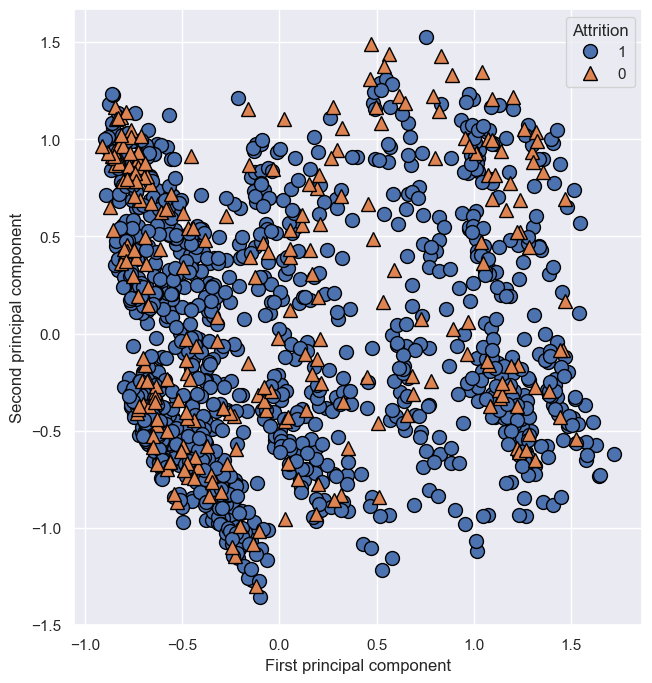

In [92]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
scatter = mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df4['Attrition'])
plt.legend(scatter, df4['Attrition'].unique(), title="Attrition", loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()


In [93]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 2.8216e-02  1.5913e-02  1.7171e-02 -5.2201e-03  1.3849e-02  1.4572e-03
   1.0561e-01  2.5079e-03  1.0326e-01  8.7497e-03  3.4698e-02 -7.9440e-03
  -1.1860e-02 -4.6557e-03  8.4770e-03  5.3589e-02  4.1169e-03  1.3516e-02
   6.1108e-02  5.2669e-02  6.7128e-02  4.6876e-02  2.8216e-02  1.8273e-02
  -6.0438e-03 -1.2229e-02  3.7191e-02 -5.7142e-01  5.3423e-01  7.9161e-03
  -8.3824e-02  1.9479e-01 -1.0615e-01 -6.0483e-03 -6.6853e-03 -4.9948e-02
   9.0092e-03 -1.8184e-01  2.3097e-02 -5.2397e-02 -2.2600e-02 -2.1319e-01
   4.4055e-01  4.7322e-02 -2.9459e-02  6.5967e-02 -3.6507e-02]
 [-9.9559e-02 -7.2900e-03 -1.3703e-02 -8.6301e-03 -1.2453e-02 -1.0095e-02
  -1.4844e-01  2.3891e-02 -1.5560e-01 -3.7891e-02  1.8513e-03 -9.8572e-03
  -1.2261e-02  6.2783e-03 -1.4766e-01 -1.5115e-01  1.5923e-02 -8.5021e-03
  -1.1557e-01 -9.6564e-02 -1.2956e-01 -9.0981e-02 -9.9559e-02  2.2889e-02
   8.5364e-02 -1.0825e-01 -7.4020e-03 -1.0903e-01  1.1643e-01  9.1971e-05
  -7.8876e-02  2.7279e-02  4.4615

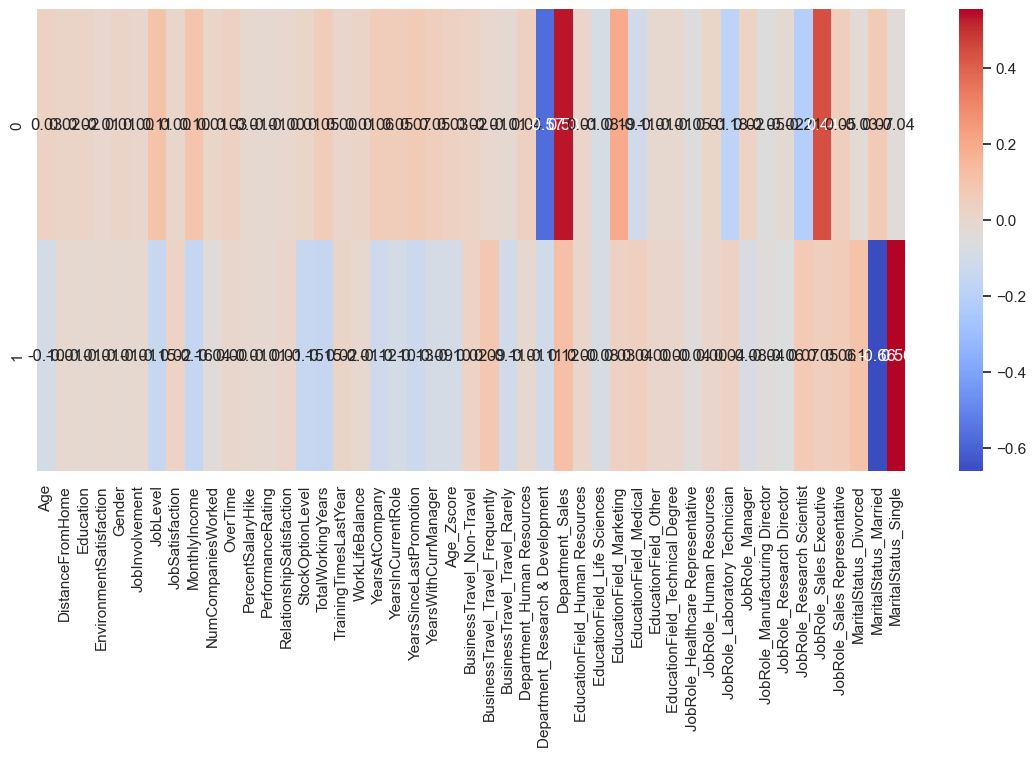

In [94]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns=X.columns)

plt.figure(figsize=(14, 6))

# Plotting heatmap
sns.heatmap(df_comp, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

# K-Means Clustering

# Machine Learning

In [102]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') 

In [138]:

X = X_scaled
y = df4['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to the training data
pca = PCA(n_components=2)  # Set the desired number of components
X_train_pca = pca.fit_transform(X_train)

# Apply the same PCA transformation to the testing data
X_test_pca = pca.transform(X_test)

# Now you can use X_train_pca and X_test_pca for training and testing your model
model = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=0)
model.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_pca)

# Evaluate the model
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


[[226  21]
 [ 42   5]] 

Accuracy: 0.7857142857142857
Precision: 0.19230769230769232
Recall: 0.10638297872340426


In [139]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [140]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.8435374149659864
Accuracy: 0.84


In [141]:
#conda install python-graphviz


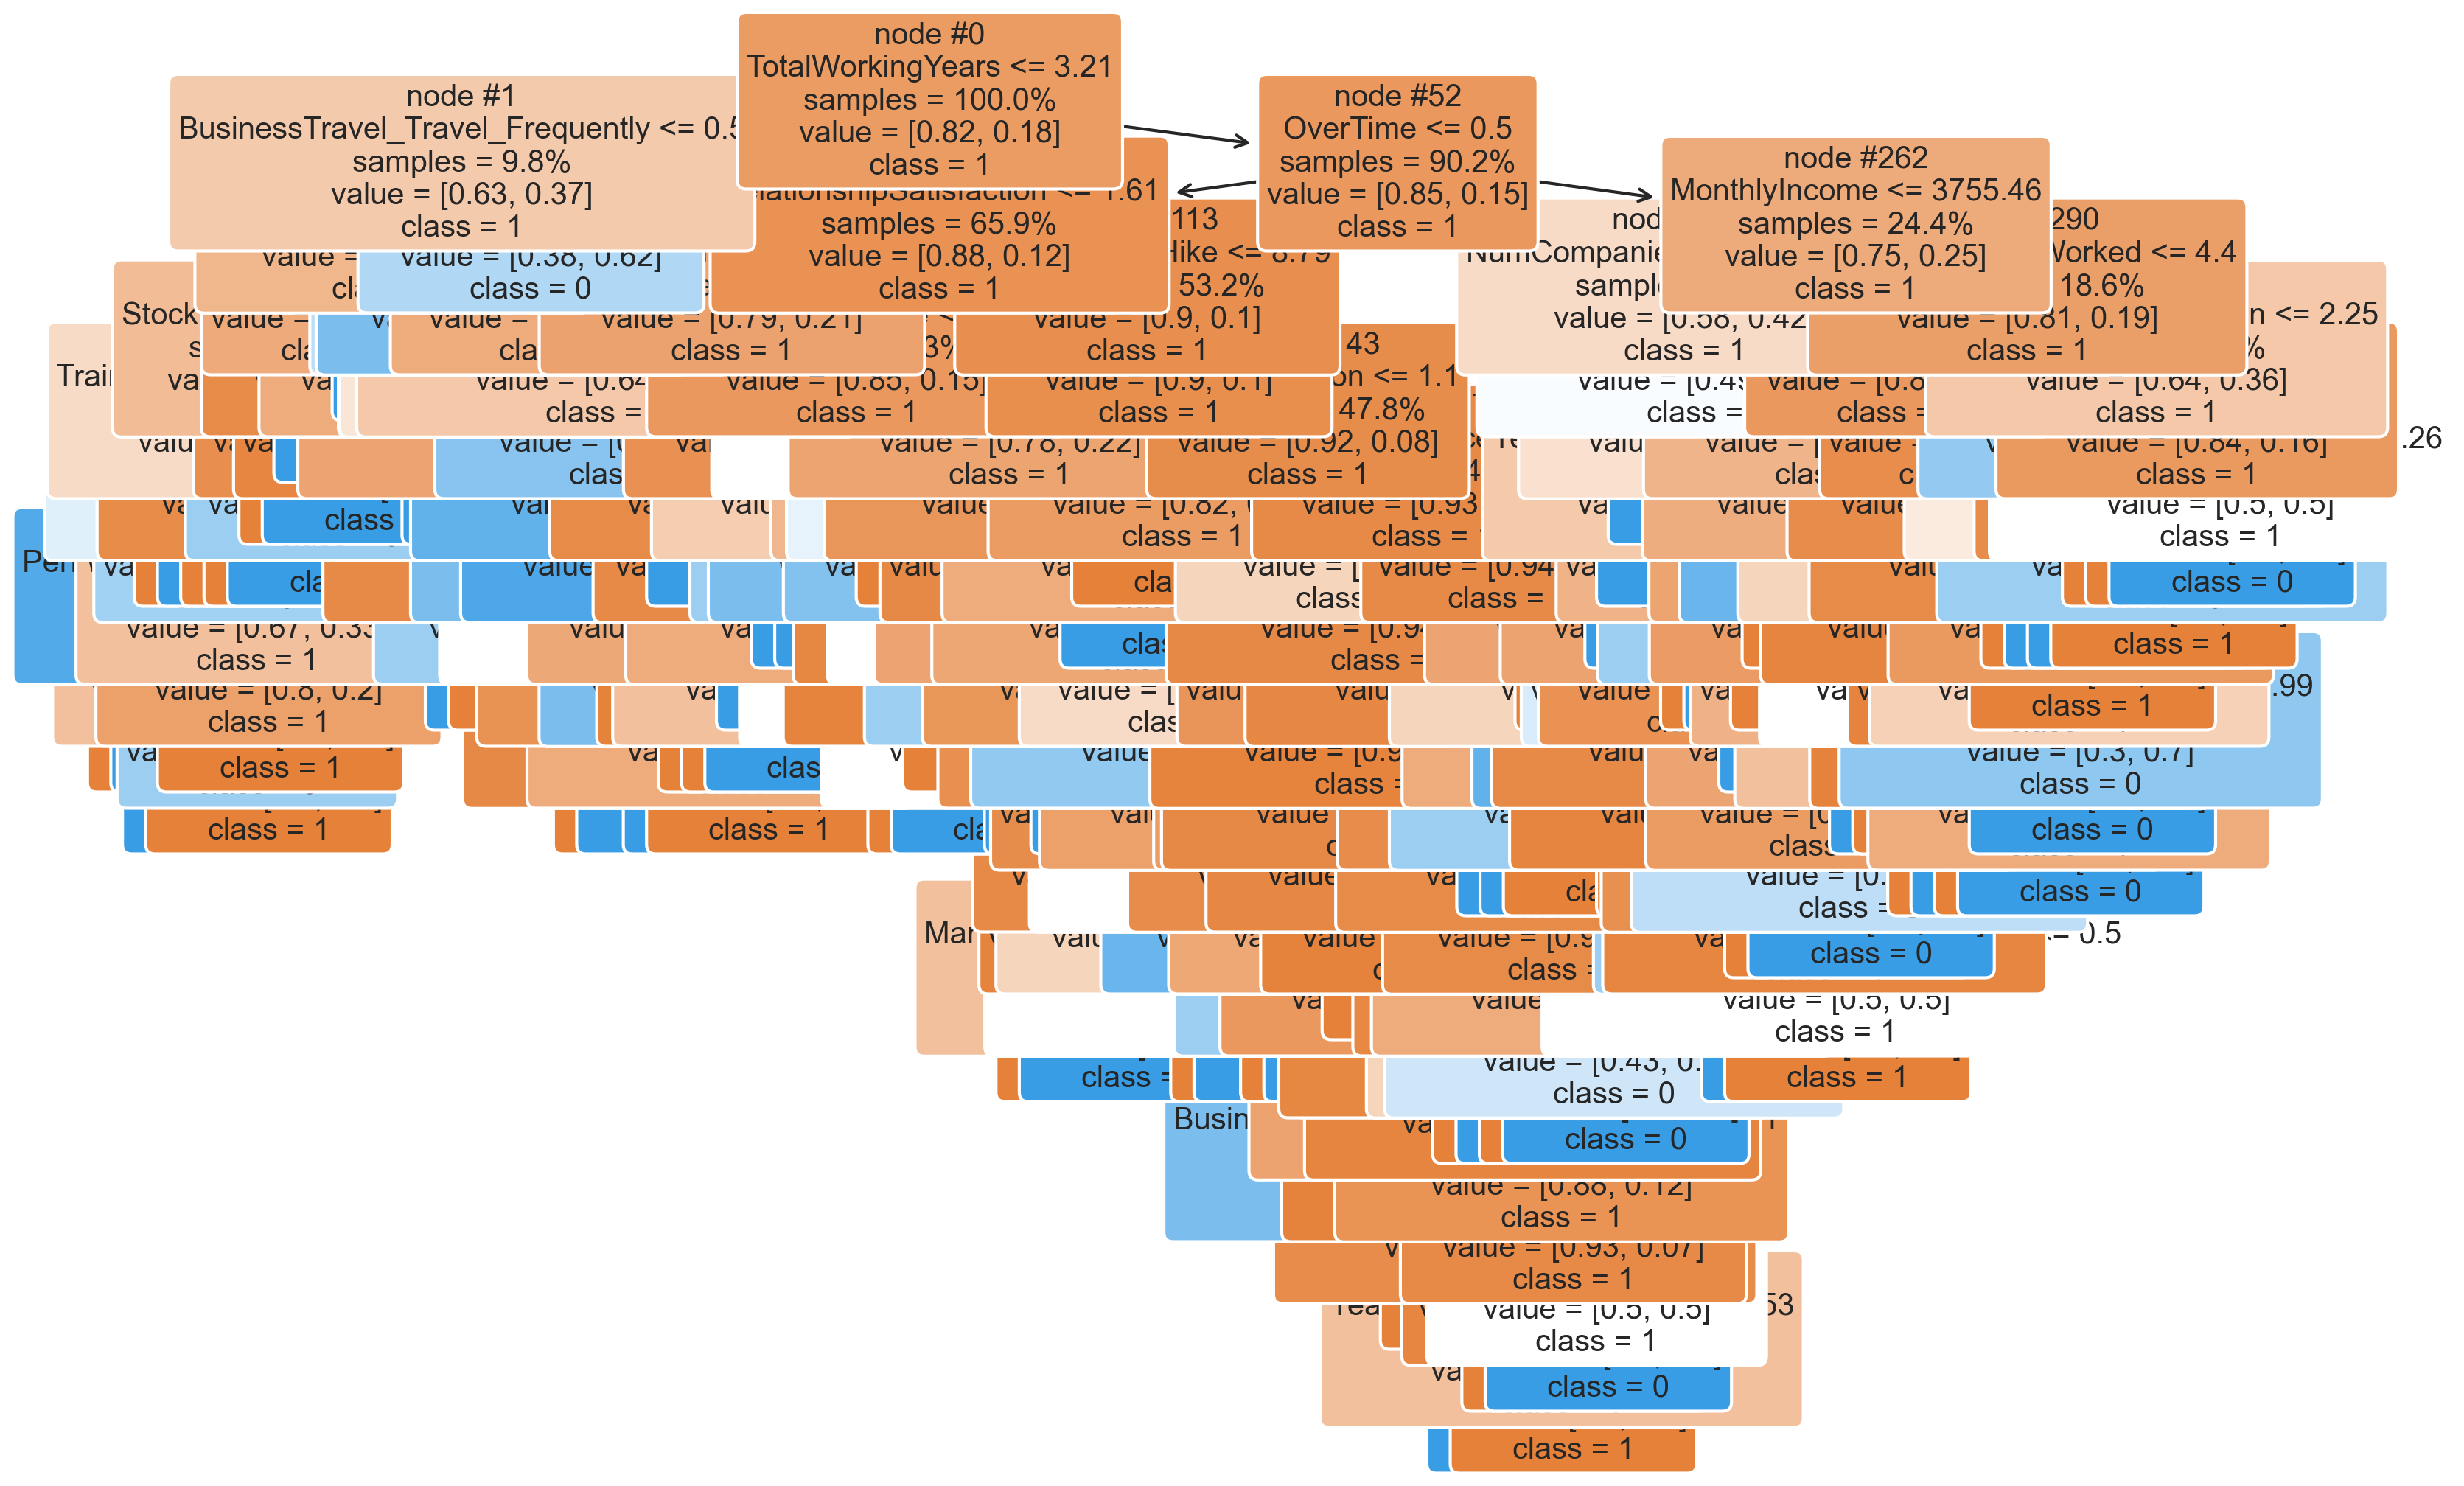

In [142]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Assuming df4 is your original DataFrame
# Drop the target variable if it is present
X_train = df4.drop('Attrition', axis=1)
y_train = df4['Attrition']

# Create a DecisionTreeClassifier and fit it to your data
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Column names for the dataset
fn = X_train.columns.tolist()

# Classes of the dataset (assuming 'Attrition' is binary)
cn = df4['Attrition'].unique().astype(str).tolist()

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), dpi=300)

tree.plot_tree(clf,
               feature_names=fn, 
               class_names=cn,
               filled=True,
               rounded=True,
               proportion=True,
               precision=2,
               fontsize=10,
               impurity=False,
               node_ids=True,
               ax=axes);

plt.show()


In [143]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[247,   0],
       [ 46,   1]], dtype=int64)

In [144]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8435374149659864
precision 1.0
recall 0.02127659574468085


# Grid Search to find optimal hyperparameters

In [145]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

# creating a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = {'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

# specify model
model = DecisionTreeClassifier(random_state=0)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=2,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[C

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.0s

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [146]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048370,0.004397,0.000615,0.000817,None,1,2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.731293,0.721088,...,0.730612,0.005442,34,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.048701,0.002299,0.000404,0.000808,None,1,5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.755102,0.734694,...,0.737415,0.013841,31,0.982143,0.979592,0.978741,0.988095,0.984694,0.982653,0.003427
2,0.037891,0.007504,0.007293,0.006904,None,1,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.785714,0.721088,...,0.742177,0.022500,28,0.943027,0.946429,0.947279,0.948129,0.953231,0.947619,0.003298
3,0.043176,0.007734,0.000508,0.000640,None,2,2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.795918,0.710884,...,0.742857,0.028668,25,0.971088,0.972789,0.973639,0.975340,0.969388,0.972449,0.002055
4,0.043927,0.014552,0.006178,0.006616,None,2,5,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.785714,0.741497,...,0.751020,0.018555,19,0.965986,0.968537,0.966837,0.968537,0.963435,0.966667,0.001894
5,0.044674,0.006630,0.001471,0.000757,None,2,10,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.802721,0.731293,...,0.744218,0.035440,22,0.931973,0.936224,0.936224,0.925170,0.937075,0.933333,0.004454
6,0.035278,0.010296,0.003604,0.006108,None,4,2,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.778912,0.751701,...,0.761224,0.014495,13,0.928571,0.924320,0.920068,0.929422,0.926871,0.925850,0.003376
7,0.039717,0.007726,0.002694,0.003875,None,4,5,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.778912,0.751701,...,0.761224,0.014495,13,0.928571,0.924320,0.920068,0.929422,0.926871,0.925850,0.003376
8,0.041769,0.008361,0.000929,0.001147,None,4,10,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.778912,0.741497,...,0.761905,0.015954,9,0.919218,0.915816,0.913265,0.917517,0.922619,0.917687,0.003154
9,0.040175,0.007914,0.000000,0.000000,10,1,2,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.806122,0.744898,...,0.762585,0.025032,8,0.955782,0.960034,0.947279,0.967687,0.964286,0.959014,0.007102


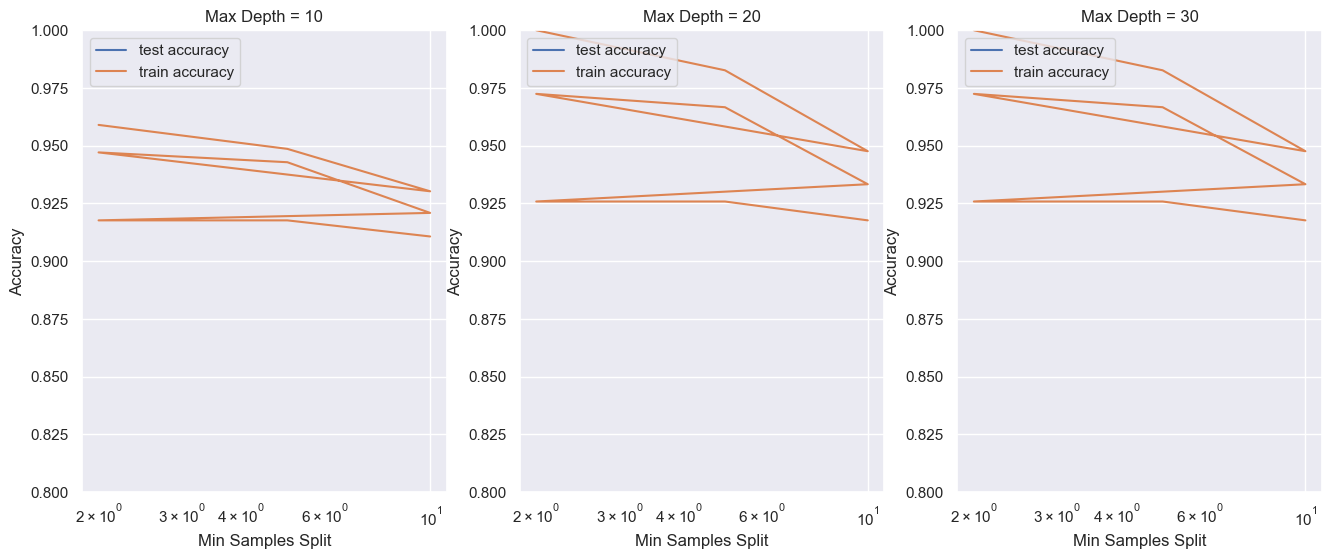

In [147]:
# plotting
plt.figure(figsize=(16, 6))

# subplot 1/3
plt.subplot(131)
max_depth_10 = cv_results[cv_results['param_max_depth'] == 10]

plt.plot(max_depth_10["param_min_samples_split"], max_depth_10["mean_test_score"])
plt.plot(max_depth_10["param_min_samples_split"], max_depth_10["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 10")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
max_depth_20 = cv_results[cv_results['param_max_depth'] == 20]

plt.plot(max_depth_20["param_min_samples_split"], max_depth_20["mean_test_score"])
plt.plot(max_depth_20["param_min_samples_split"], max_depth_20["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 20")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
max_depth_30 = cv_results[cv_results['param_max_depth'] == 30]

plt.plot(max_depth_30["param_min_samples_split"], max_depth_30["mean_test_score"])
plt.plot(max_depth_30["param_min_samples_split"], max_depth_30["mean_train_score"])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title("Max Depth = 30")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()


In [148]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7707482993197279 corresponding to hyperparameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [149]:
print("Training data dimensions:", X_train.shape)
print("Testing data dimensions:", X_test.shape)
print("Features used in training:", X_train.columns)


Training data dimensions: (1470, 48)
Testing data dimensions: (294, 47)
Features used in training: Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_Zscore', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_H

In [150]:
print("Number of features in testing data:", X_test.shape[1])



Number of features in testing data: 47


In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# specify optimal hyperparameters
best_params = {"max_depth": 10, "min_samples_split": 2, "min_samples_leaf": 2}

# model
model = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))


ValueError: X has 47 features, but DecisionTreeClassifier is expecting 48 features as input.